In [1]:
#!pip install gradio
#!pip install graphviz
#!pip install xgboost

# User_Driven_House_Price_Prediction

# Importing the Dependencies

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Collection and Cleaning

In [3]:
#loading the dataset
data=pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#last 5 rows of the dataset
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
#Number of rows and columns in dataset
data.shape

(13320, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
#columns in dataset
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
#unique values of column "area_type"
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
#counts of unique values
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

# Dropping features that are not required to build the model

In [10]:
data2 = data.drop(['area_type','society','balcony','availability'],axis='columns')
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
data2.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [12]:
#checking null values
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
data2.shape

(13320, 5)

In [14]:
#dropping null values
data3 = data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
data3.shape

(13246, 5)

In [16]:
#checking datatypes of the dataset
data3.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [17]:
#checking duplicates in the dataset
data3[data3.duplicated()]

,location,size,total_sqft,bath,price
242,Chandapura,1 BHK,645,1.0,16.45
887,Chandapura,2 BHK,1015,2.0,25.88
895,Whitefield,2 BHK,1116,2.0,51.91
905,Kanakpura Road,1 BHK,525,1.0,26.00
971,Haralur Road,3 BHK,1464,3.0,56.00
...,...,...,...,...,...
13291,Weavers Colony,1 Bedroom,812,1.0,26.00
13299,Whitefield,4 BHK,2830 - 2882,5.0,154.50
13311,Ramamurthy Nagar,7 Bedroom,1500,9.0,250.00
13313,Uttarahalli,3 BHK,1345,2.0,57.00


In [18]:
#dropping duplicated values
data3.drop_duplicates()
data3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [19]:
data3.reset_index()

,index,location,size,total_sqft,bath,price
0,0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,2,Uttarahalli,3 BHK,1440,2.0,62.00
3,3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13241,13315,Whitefield,5 Bedroom,3453,4.0,231.00
13242,13316,Richards Town,4 BHK,3600,5.0,400.00
13243,13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13244,13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Feature Engineering

In [20]:
#unique size in the datset
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
#Adding new feature(integer) for bhk (Bedrooms Hall Kitchen)
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\369843610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))


In [22]:
data3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [23]:
#unique values in bhk column
data3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [24]:
#Explore total_sqft feature
data3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
data3[~data3['total_sqft'].apply(is_float)].head(5)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value 
in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. 
I am going to just drop such corner cases to keep things simple

In [27]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [28]:
convert_sqft_to_num('2100') #returned float value

2100.0

In [29]:
convert_sqft_to_num('3090 - 5002')   #returned avg of min and max values

4046.0

In [30]:
convert_sqft_to_num('4125Perch')    #returned nothing

In [31]:
data4 = data3.copy()
data4['total_sqft'] = data4['total_sqft'].apply(convert_sqft_to_num)

In [32]:
data4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [33]:
data4.loc[672]

location      Bettahalsoor
size             4 Bedroom
total_sqft          4046.0
bath                   4.0
price                445.0
bhk                      4
Name: 672, dtype: object

In [34]:
#Adding new feature called price per square feet
data5 = data4.copy()
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']
data5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
data5_stats = data5['price_per_sqft'].describe()
data5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [36]:
#converting into csv file
#data5.to_csv("bhp.csv",index=False)

In [37]:
#exploring location feature
len(data5['location'].unique())

1304

# Dimensionality Reduction

Examine locations which is a categorical variable. 
We need to apply dimensionality reduction technique here to reduce number of locations

In [38]:
data5['location'] = data5['location'].apply(lambda x: x.strip())
location_stats = data5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [39]:
len(location_stats)

1293

In [40]:
len(location_stats[location_stats<=10])

1052

In [41]:
len(location_stats[location_stats>10])

241

In [42]:
location_stats_lessthan10 = location_stats[location_stats<=10]
location_stats_lessthan10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [43]:
len(data5['location'].unique())

1293

In [44]:
data5['location'] = data5['location'].apply(lambda x: 'Other Location' if x in location_stats_lessthan10 else x)

In [45]:
len(data5['location'].unique())

242

In [46]:
data5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other Location,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Detection & Removal using Business Logic

As a data scientist when we have a conversation with your business manager (who has expertise in real estate), 
he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. 
If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [47]:
data5[data5.total_sqft/data5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Other Location,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other Location,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [48]:
data5.shape

(13246, 7)

In [49]:
data6 = data5[~(data5.total_sqft/data5.bhk<300)]

In [50]:
data6.shape

(12502, 7)

# Outlier Removal Using Standard Deviation and Mean

In [51]:
data6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. 
We should remove outliers per location using mean and one standard deviation

In [52]:
def remove_pps_outliers(data):
    data_out = pd.DataFrame()
    for key, subdata in data.groupby('location'):
        m = np.mean(subdata.price_per_sqft)
        st = np.std(subdata.price_per_sqft)
        reduced_data = subdata[(subdata.price_per_sqft>(m-st)) & (subdata.price_per_sqft<=(m+st))]
        data_out = pd.concat([data_out,reduced_data],ignore_index=True)
    return data_out
data7 = remove_pps_outliers(data6)
data7.shape

(10241, 7)

#Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

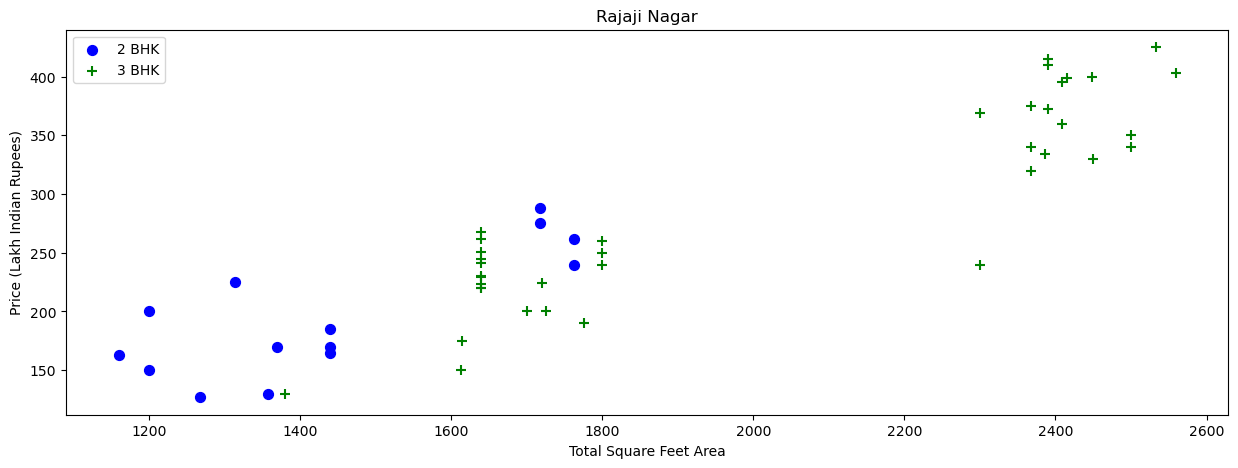

In [53]:
def plot_scatter_chart(data,location):
    bhk2 = data[(data.location==location) & (data.bhk==2)]
    bhk3 = data[(data.location==location) & (data.bhk==3)]
    plt.figure(figsize=(15,5))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data7,"Rajaji Nagar")

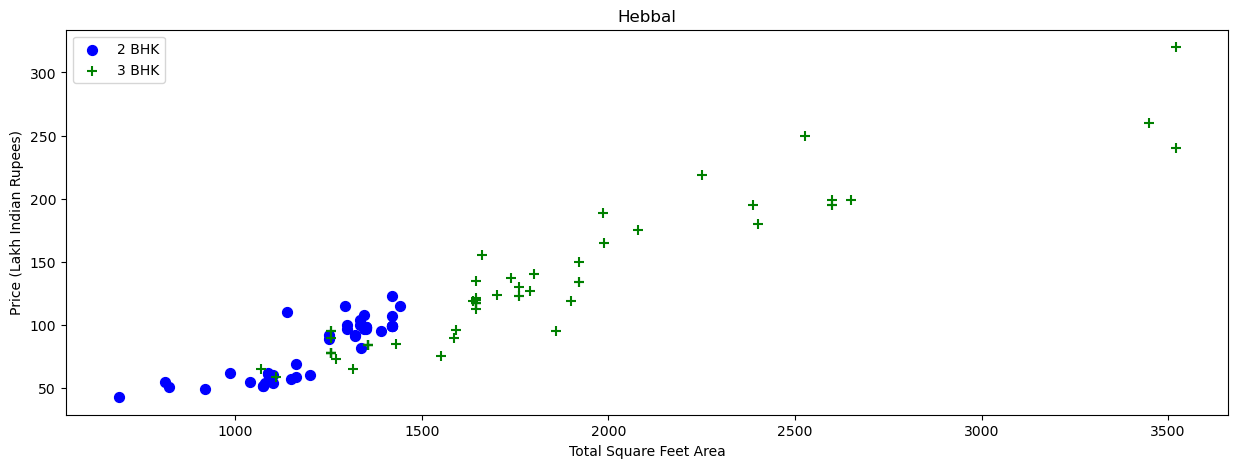

In [54]:
plot_scatter_chart(data7,"Hebbal")

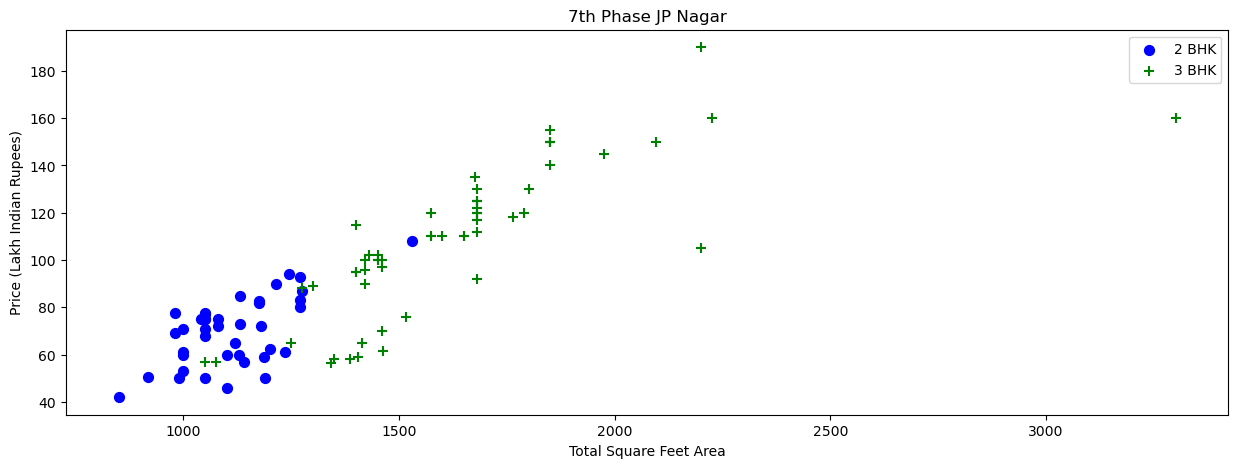

In [55]:
plot_scatter_chart(data7,"7th Phase JP Nagar")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 
2 bedroom apartment (with same square ft area). What we will do is for a given location, 
we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [56]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_data in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_data in location_data.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_data.price_per_sqft),
                'std': np.std(bhk_data.price_per_sqft),
                'count': bhk_data.shape[0]
            }
        for bhk, bhk_data in location_data.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_data[bhk_data.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data8 = remove_bhk_outliers(data7)
# data8 = data7.copy()
data8.shape

(7329, 7)

# Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

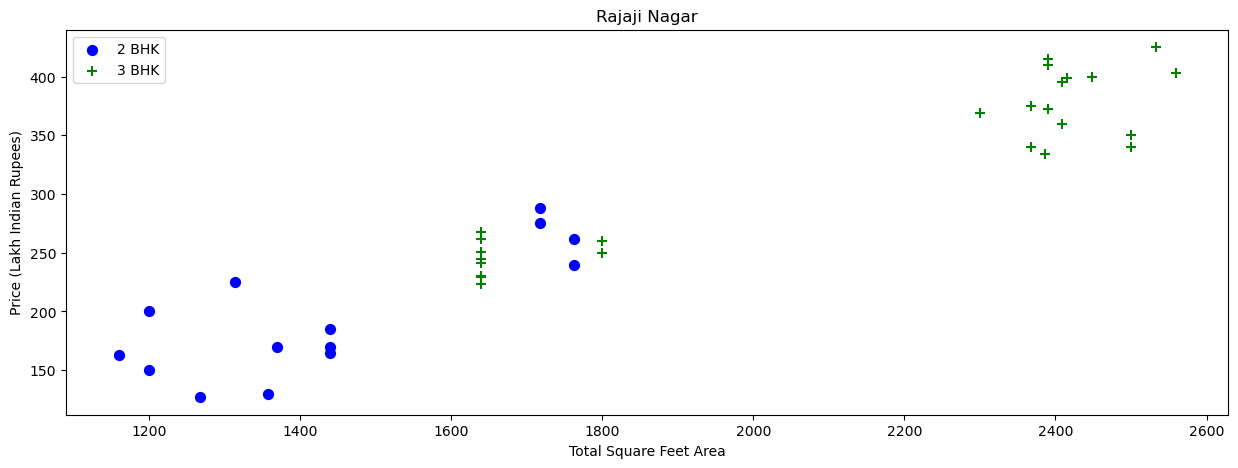

In [57]:
plot_scatter_chart(data8,"Rajaji Nagar")

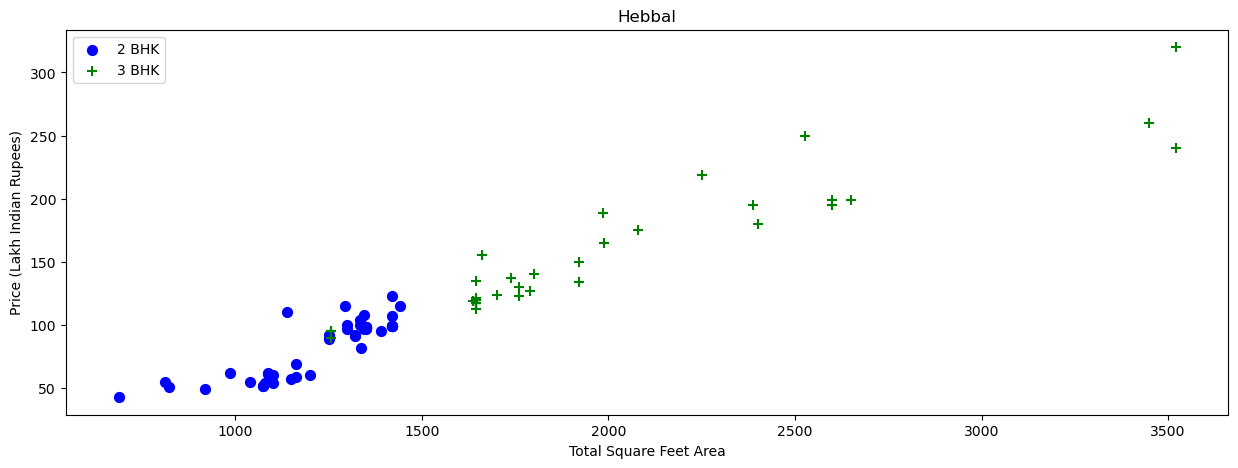

In [58]:
plot_scatter_chart(data8,"Hebbal")

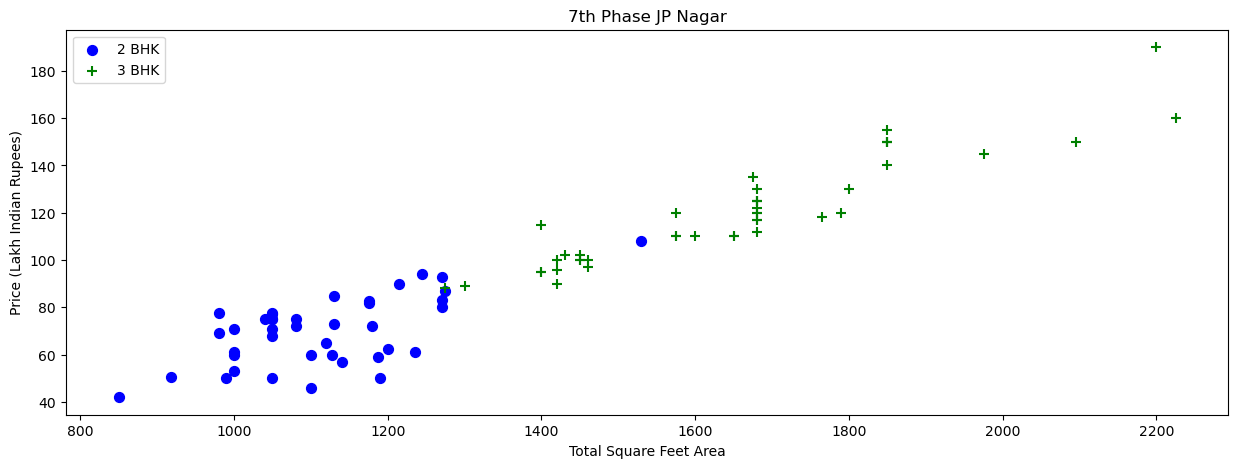

In [59]:
plot_scatter_chart(data8,"7th Phase JP Nagar")

# Histogram for Price Per Square Feet vs Count

Text(0, 0.5, 'Count')

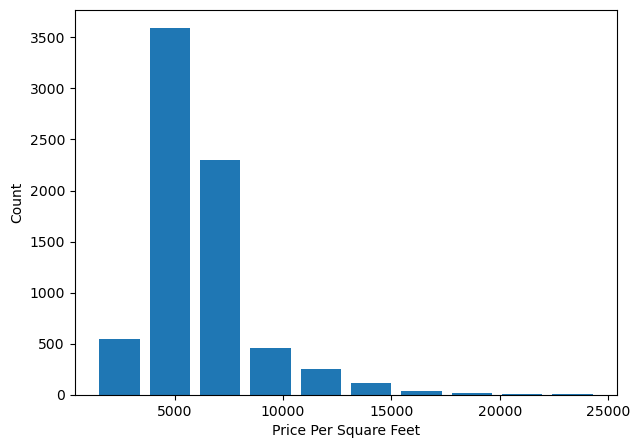

In [60]:
plt.figure(figsize=(7,5))
plt.hist(data8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature

In [61]:
data8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [62]:
data8[data8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5925,Other Location,10 BHK,12000.0,12.0,525.0,10,4375.000000
6014,Other Location,16 BHK,10000.0,16.0,550.0,16,5500.000000
6747,Other Location,11 BHK,6000.0,12.0,150.0,11,2500.000000
7078,Other Location,13 BHK,5425.0,13.0,275.0,13,5069.124424


# Histogram for Number of bathrooms vs Count

Text(0, 0.5, 'Count')

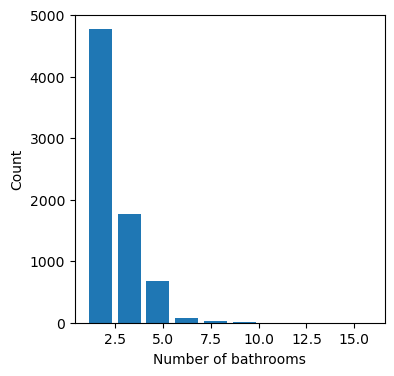

In [63]:
plt.figure(figsize=(4,4))
plt.hist(data8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [64]:
data8[data8.bath>data8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5850,Other Location,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home 
and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. 
Anything above that is an outlier or a data error and can be removed

In [65]:
data9 = data8[data8.bath<data8.bhk+2]
data9.shape

(7251, 7)

In [66]:
data9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [67]:
data10 = data9.drop(['size','price_per_sqft'],axis='columns')
data10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Data Visualization

array([[<Axes: title={'center': 'total_sqft'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bhk'}>],
       [<Axes: title={'center': 'price_per_sqft'}>, <Axes: >]],
      dtype=object)

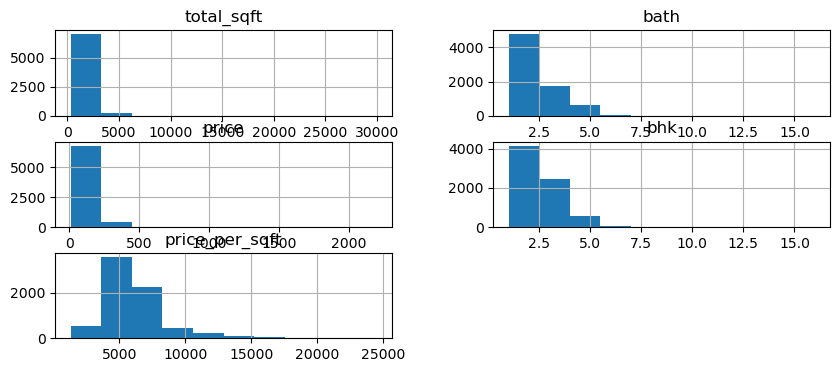

In [68]:
data9.hist(figsize=(10,4))

<Axes: >

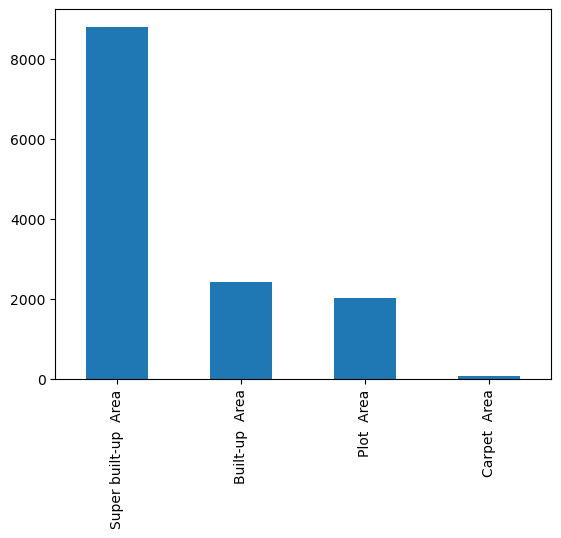

In [69]:
data.area_type.value_counts().plot(kind='bar')

C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\3166204305.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data9["total_sqft"])


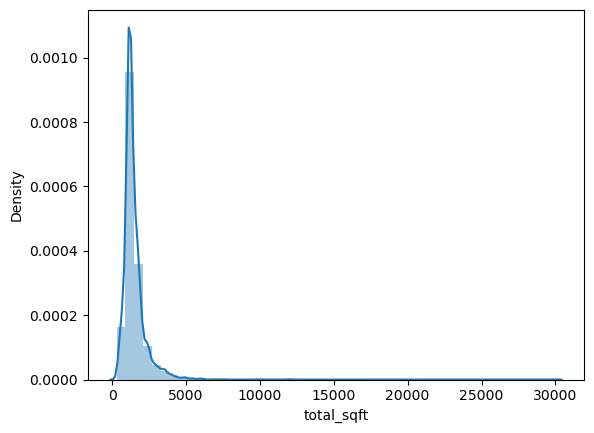

<Figure size 400x400 with 0 Axes>

In [70]:
sns.distplot(data9["total_sqft"])  
plt.figure(figsize=(4,4))
plt.show()

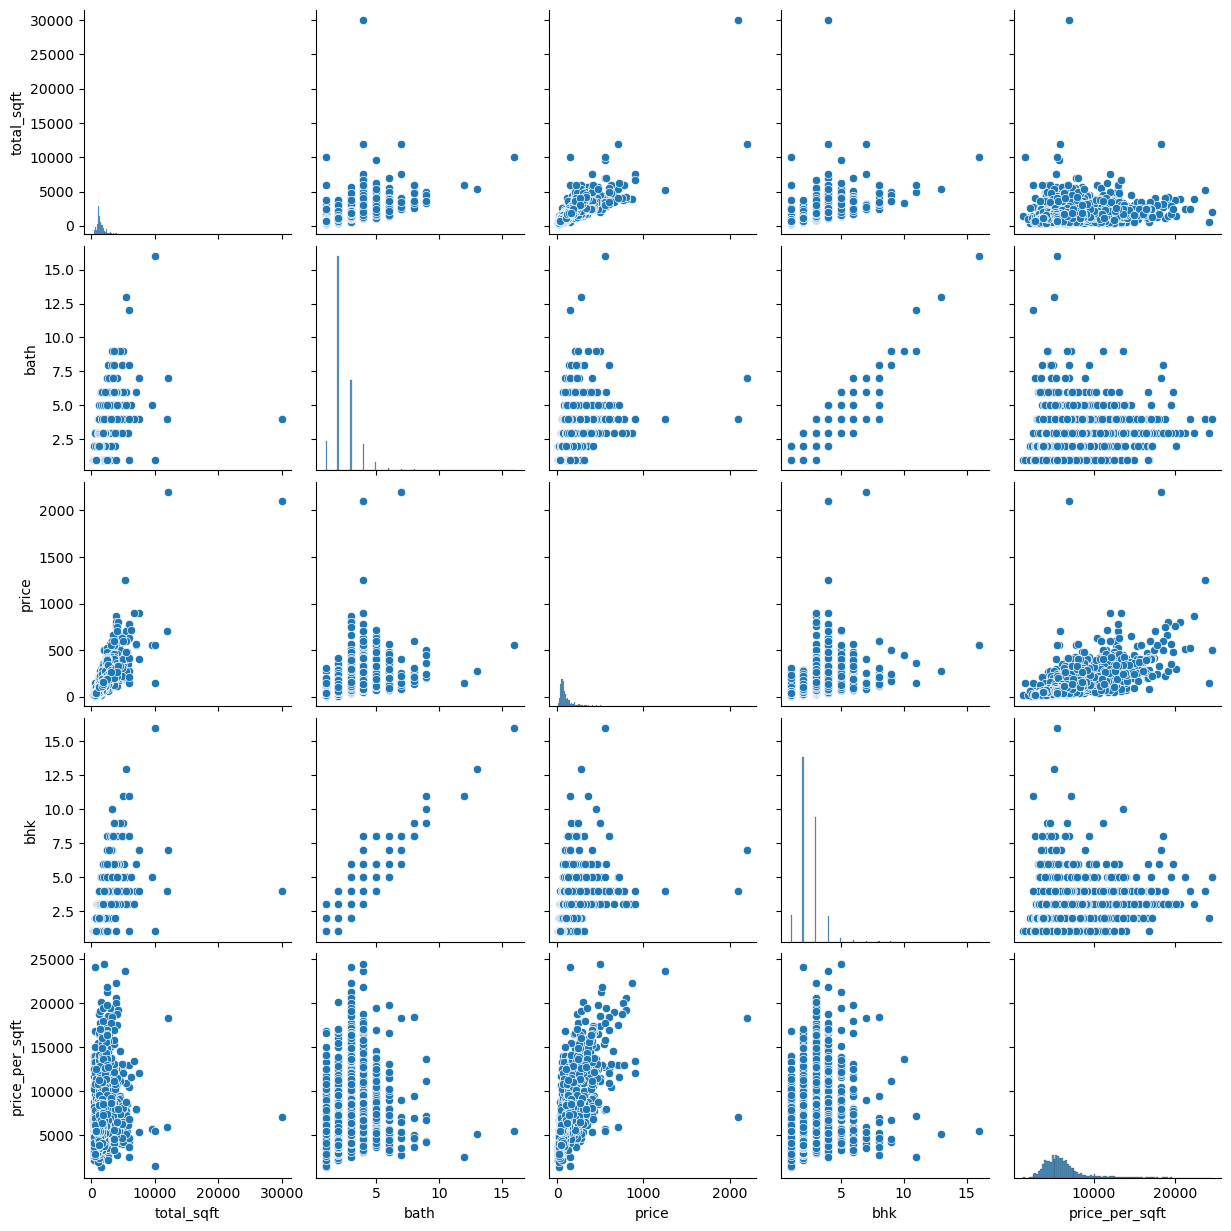

In [71]:
sns.pairplot(data9)  
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2148\3833683595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data9.corr()


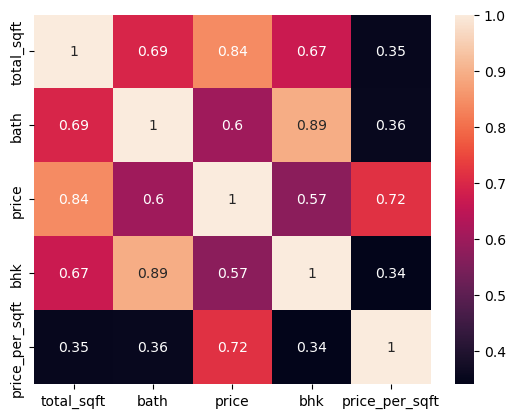

In [72]:
correlation_matrix = data9.corr()
sns.heatmap(correlation_matrix, annot=True)  # Annotate with correlation values
plt.show()

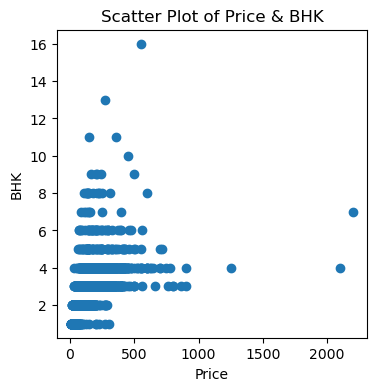

In [73]:
plt.figure(figsize=(4, 4))
plt.scatter(data9["price"], data9["bhk"])
plt.xlabel("Price")
plt.ylabel("BHK")
plt.title("Scatter Plot of Price & BHK")
plt.show()

# Use of One Hot Encoding for Location

In [74]:
dummies = pd.get_dummies(data10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
data11 = pd.concat([data10, dummies.drop('Other Location', axis='columns')],axis = 'columns')
data11.head(5)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
data12 = data11.drop('location',axis='columns')
data12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
data12.shape

(7251, 245)

# Model Building

In [78]:
X = data12.drop(['price'],axis=1)
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X.shape

(7251, 244)

In [80]:
y = data12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [81]:
len(y)

7251

# Linear regression implementation

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [83]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
model.score(X_test,y_test)

0.8108830052514324

In [86]:
# Make predictions on test data
y_pred = model.predict(X_test)
y_pred

array([ 70.83645646,  85.40336678,  34.47273413, ..., 294.7899094 ,
        56.53724838, 117.95573199])

In [87]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 35.59489363084769


In [88]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8108830052514324

# K Fold cross validation to measure accuracy of our LinearRegression model

In [89]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [90]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85430675, 0.84187647, 0.84728412, 0.85171729, 0.87168018])

We can see that in 5 iterations we get a score above 80% all the time. 
This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. 
We will use GridSearchCV for this purpose

# Lasso Regression Implementation

In [91]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [92]:
# Replace with the appropriate hyperparameter (alpha) for regularization strength
lasso_regressor = Lasso(alpha=0.1)  # Adjust alpha as needed


In [93]:
lasso_regressor.fit(X_train, y_train)


Lasso(alpha=0.1)

In [94]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([ 71.27066449,  92.60504678,  52.35199721, ..., 279.09652359,
        64.31338622, 121.95737236])

In [95]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [96]:
y_pred_lasso

array([ 71.27066449,  92.60504678,  52.35199721, ..., 279.09652359,
        64.31338622, 121.95737236])

In [97]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred_lasso)

# Calculate RMSE (square root of MSE)
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_lasso)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 1533.3838994271362
Root Mean Squared Error (RMSE): 39.158446080343076
Mean Absolute Error (MAE): 20.99100692002009


# Decision Tree Implementation

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [99]:
# Feature scaling (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

In [100]:
# Create a Decision Tree Regressor
decision_tree = DecisionTreeRegressor(max_depth=5)  # Adjust max_depth as needed

In [101]:
#Train the model
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5)

In [102]:
# Make predictions on the test set
y_pred = decision_tree.predict(X_test_scaled)
y_pred

array([ 74.03393191,  74.03393191,  47.67943009, ..., 334.18794326,
        56.12827496, 112.99735763])

In [103]:
# Evaluate model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} Lakhs")

Root Mean Squared Error (RMSE): 43.62 Lakhs


# XGBoost Implementation

In [104]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [105]:
# Create XGBoost model
model = XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
# Make predictions on test set
y_pred = model.predict(X_test)
y_pred

array([ 70.91308 ,  78.63496 ,  42.941513, ..., 316.69876 ,  66.14383 ,
       118.18212 ], dtype=float32)

In [108]:
# Evaluate model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} Lakhs")

Root Mean Squared Error (RMSE): 30.83 Lakhs


In [109]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): ₹{mae:.2f} Lakhs")


Mean Absolute Error (MAE): ₹16.52 Lakhs


In [110]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


R-squared: 0.86


# SVM Implementation

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [112]:
# Feature scaling (SVM is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
# Create SVR model
model = SVR(kernel='rbf') 
model

SVR()

In [114]:
# Train the model
model.fit(X_train_scaled, y_train)

SVR()

In [115]:
# Make predictions on test set
y_pred = model.predict(X_test_scaled)
y_pred

array([ 79.30574282,  85.06123152,  56.18015517, ..., 147.63649463,
        81.11899761,  93.79498823])

In [116]:
# Evaluate model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} Lakhs")

Root Mean Squared Error (RMSE): 72.83 Lakhs


# Random Forest Classification

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [118]:
# Create Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100)
model

RandomForestRegressor()

In [119]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [120]:
# Make predictions on test set
y_pred = model.predict(X_test)
y_pred

array([ 68.82947382,  87.6377    ,  48.2901    , ..., 365.17303571,
        58.46217671, 105.14483333])

In [121]:
# Evaluate model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} Lakhs")

Root Mean Squared Error (RMSE): 38.87 Lakhs


  # Find best model using GridSearchCV

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [123]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])



In [124]:
find_best_model_using_gridsearchcv(X,y)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 600, 

,model,best_score,best_params
0,linear_regression,0.853373,{'positive': False}
1,lasso,0.727543,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.711833,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

# Test the model for few properties

In [125]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [126]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [127]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.32923823529944

In [128]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.3800239887779

In [129]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


153.6058732398416

# Export the tested model to a pickle file

In [130]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [131]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [132]:
import joblib

In [133]:
joblib.dump(predict_price, "banglore_home_prices_model")

['banglore_home_prices_model']

In [134]:
model = joblib.load("banglore_home_prices_model")

In [135]:
model

<function __main__.predict_price(location, sqft, bath, bhk)>

# Model Deployment

In [136]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle
import json

In [137]:
with open('banglore_home_prices_model.pickle', 'rb') as f:
    model = pickle.load(f)

# Load the column information
with open("columns.json", "r") as f:
    columns = json.load(f)

In [138]:
def predict_price(location, sqft, bath, bhk):
    loc_index = columns['data_columns'].index(location.lower())
    x = np.zeros(len(columns['data_columns']))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return model.predict([x])[0]

In [139]:
iface = gr.Interface(fn=predict_price, 
                     inputs=["text", "number", "number", "number"], 
                     outputs="text",
                     title="User Driven House Price Prediction Model",
                     examples=[["1st Phase JP Nagar", 1000, 2, 2]])



# Launch the interface
iface.launch()

Running on local URL:  http://127.0.0.1:7860

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB

To create a public link, set `share=True` in `launch()`.
